In [5]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from continuous import *
from discrete_simulation import *
from dataclasses import dataclass

# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## parameters

In [2]:
@dataclass
class ContSimResults:
    N: int
    d: int
    m_i: int
    m_c: int
    alpha: float
    simulationObject: ContinuousSimulation
    fid_prob_list: list
    gamma_list: list

    def get_fid_array(self):
        return [tup[0] for tup in self.fid_prob_list]
    
    def get_prob_array(self):
        return [tup[1] for tup in fid_prob_list]



In [3]:
d = 16
m_i = 8
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,15)
gamma_ratio = 1
alpha=10

## First Discrete part

In [9]:
m_c = 4

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list164 = [tup[0] for tup in fid_prob_list]
prob_list164 = [tup[1] for tup in fid_prob_list]

m_c = 8

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168 = [tup[0] for tup in fid_prob_list]
prob_list168 = [tup[1] for tup in fid_prob_list]

## Now continuous part

In [ ]:
m_c = 4
n = 7
N = 2**n

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=16)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))

fid_list_con4 = [tup[0] for tup in fid_prob_list]
prob_list_con4 = [tup[1] for tup in fid_prob_list]

In [24]:
simRes4 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=}.pkl', 'wb') as file:
    dill.dump(simRes4, file)

In [25]:
m_c = 8
n = 7
N = 2**n

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]


simRes8 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=}.pkl', 'wb') as file:
    dill.dump(simRes8, file)

# squeezing

In [13]:
m_c = 8
n = 8
N = 200
squeezed = -1

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8, squeezed = squeezed)


fid_prob_list = []
for gamma in tqdm(gamma_list):
    fid_prob_list.append(sim.average_fidelity(gamma, gamma_ratio*gamma, fidelity_cut))
    print(fid_prob_list)
fid_list_con8_sq = [tup[0] for tup in fid_prob_list]
prob_list_con8_sq = [tup[1] for tup in fid_prob_list]


simRes8sq = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{squeezed=}2.pkl', 'wb') as file:
    dill.dump(simRes8sq, file)

  0%|          | 0/15 [00:00<?, ?it/s]

calculating for gamma_loss=0.001, gamma_dephasing=0.001
start, A1=0, B1=0, A2=0, B2=0
s_B=0
operator creation time: 1.611147165298462
before rotation
matrix multiplication time: 16.77850651741028
decoding time: 3.482163906097412
probability=(0.20076728730519988+0j)
start, A1=0, B1=0, A2=0, B2=1
s_B=0
operator creation time: 0.08795046806335449
before rotation
matrix multiplication time: 7.24017333984375
decoding time: 2.4547102451324463
probability=(0.00030452171653984214+0j)
start, A1=0, B1=0, A2=0, B2=2
s_B=0
operator creation time: 0.09994792938232422
before rotation
matrix multiplication time: 10.774307250976562
decoding time: 2.850498676300049
probability=(0.00426030897284323+0j)
start, A1=0, B1=0, A2=0, B2=3
s_B=0
operator creation time: 0.08795547485351562
before rotation
matrix multiplication time: 14.132535934448242
decoding time: 3.1623294353485107
probability=(0.04111339635348286+0j)
start, A1=0, B1=0, A2=1, B2=0
s_B=0
operator creation time: 0.0879521369934082
before rotati

C:\Program Files\Python311\Lib\site-packages\scipy\sparse\_base.py:647: RuntimeWarning: divide by zero encountered in scalar divide
  r = self._mul_scalar(1./other)


decoding time: 1.4152545928955078
probability=(5.181081150225369e-11+0j)
start, A1=1, B1=1, A2=0, B2=1
s_B=1
operator creation time: 0.08395195007324219
before rotation
matrix multiplication time: 3.634080410003662
decoding time: 1.4112591743469238
probability=(1.985438305117357e-10+0j)
start, A1=1, B1=1, A2=0, B2=2
s_B=1
operator creation time: 0.07995748519897461
before rotation
matrix multiplication time: 5.78094482421875
decoding time: 1.4272480010986328
probability=(1.6146395951141524e-09+0j)
start, A1=1, B1=1, A2=0, B2=3
s_B=1
operator creation time: 0.07597541809082031
before rotation
matrix multiplication time: 7.460040807723999
decoding time: 1.4752209186553955
probability=(7.937635289580733e-09+0j)
start, A1=1, B1=1, A2=1, B2=0
s_B=1
operator creation time: 0.07596325874328613
before rotation
matrix multiplication time: 3.582106828689575
decoding time: 1.4112544059753418
probability=(1.9854383051184302e-10+0j)
start, A1=1, B1=1, A2=1, B2=1
s_B=1
operator creation time: 0.0799

In [ ]:
m_c = 8
n = 8
N = 170
squeezed = -1

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8, squeezed = squeezed)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8_sq = [tup[0] for tup in fid_prob_list]
prob_list_con8_sq = [tup[1] for tup in fid_prob_list]


simRes8sq = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{squeezed=}.pkl', 'wb') as file:
    dill.dump(simRes8sq, file)

In [11]:
m_c = 8
n = 7
N = 2**n
proObj = ContinuousProtocol(coherent(N,alpha),res=16,m_i=m_i, m_c=8)
limit = (coherent(N,10).dag() * proObj._create_phase_parity_measurement(1) * coherent(N,10)).full()[0][0]

### opening results from last time if needed:

In [7]:
with open("results/2023-08-31,simResm_c=8,alpha=10.pkl", 'rb') as file:
    contsimres = dill.load(file)
fid_prob_list = contsimres.fid_prob_list

fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]

Text(0.5, 1.0, '$d=16,m_i=8, \\alpha=10 $')

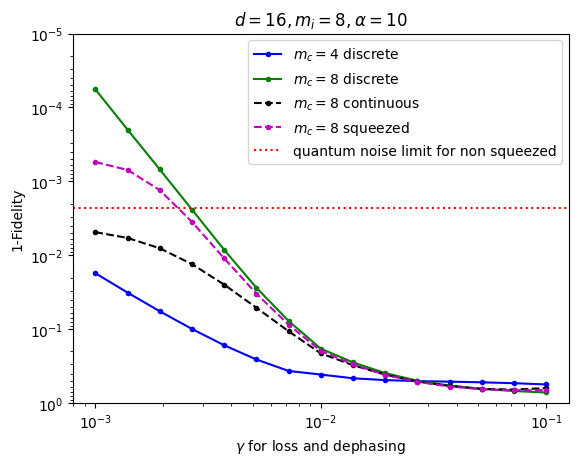

In [15]:
plt.figure(dpi=100)

plt.loglog(gamma_list,1-np.array(fid_list164), 'b.-', label="$m_c=4$ discrete")
plt.loglog(gamma_list,1-np.array(fid_list168), 'g.-', label="$m_c=8$ discrete")
# plt.loglog(gamma_list,1-np.array(fid_list_con4), 'c.--', label="$m_c=4$ continuous")
plt.loglog(gamma_list,1-np.array(fid_list_con8), 'k.--', label="$m_c=8$ continuous")
plt.loglog(gamma_list,1-np.array(fid_list_con8_sq), 'm.--', label="$m_c=8$ squeezed")

plt.axhline(limit, color = 'r', linestyle = ':', label="quantum noise limit for non squeezed")

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
plt.ylim([1,1e-5])
# plt.xlim([1e-2,1e-1])
plt.legend()
plt.title(f"${d=},{m_i=}, \\alpha={alpha} $")
# plt.gca().invert_yaxis()

In [ ]:
import dill

with open('fid_list_con4.pkl', 'wb') as file:
    dill.dump(fid_list_con4, file)